In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:

url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=61.46&lon=6.46"
headers = {
    "User-Agent": "DittNavn/DinEpost"  # Yr.no krever at du identifiserer deg
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    weather_data = response.json()  # Konverterer JSON til en Python-dictionary
    
else:
    print(f"Feil! Statuskode: {response.status_code}")



In [4]:

# Eksempel: hente temperaturdata
timeseries = weather_data["properties"]["timeseries"]

# Lage en liste med dato og temperatur
weather_list = [
    {"time": entry["time"], "temperature": entry["data"]["instant"]["details"]["air_temperature"]}
    for entry in timeseries
]

df = pd.DataFrame(weather_list)  # Konvertere til DataFrame
print(df.head())  # Se de første radene


                   time  temperature
0  2025-02-21T13:00:00Z          0.3
1  2025-02-21T14:00:00Z          0.6
2  2025-02-21T15:00:00Z          1.2
3  2025-02-21T16:00:00Z          0.9
4  2025-02-21T17:00:00Z          1.1


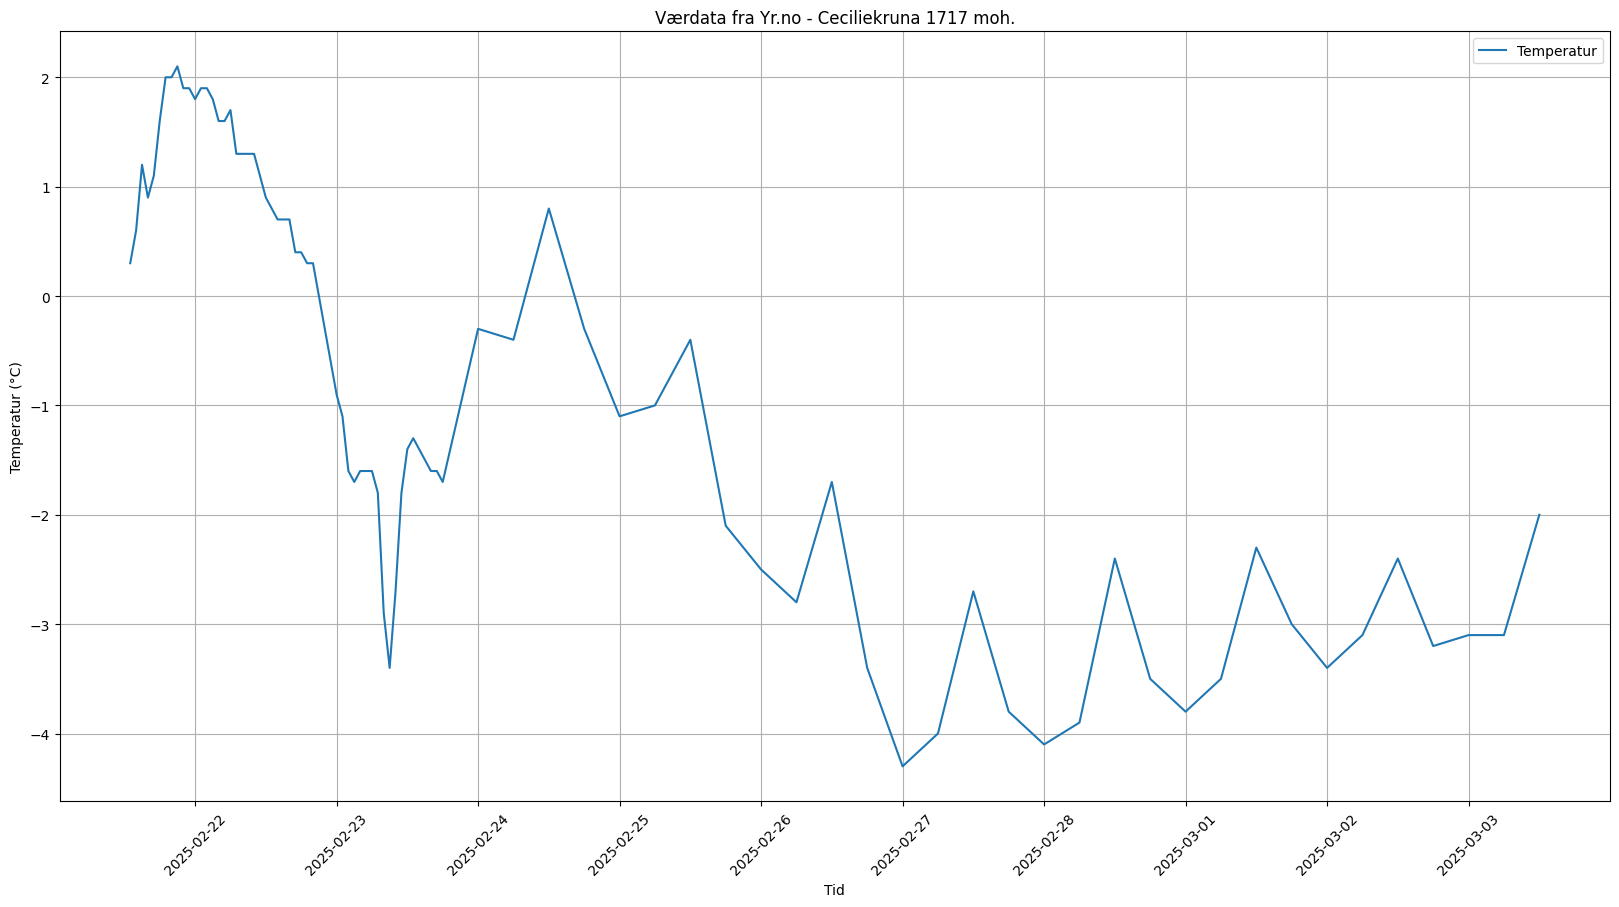

In [25]:
plt.figure(figsize=(20,10))

df["time"] = pd.to_datetime(df["time"]) 
plt.plot(df["time"], df["temperature"], label="Temperatur")

plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Værdata fra Yr.no - Ceciliekruna 1717 moh.")

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()
